In [2]:
import pandas as pd
import metapredict as meta
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

/Users/NFHummel/opt/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
info = pd.read_csv('Tables/Twist_library_more_info.csv')

In [11]:
info['metapredict']= info.protein.apply(lambda x: meta.predict_disorder_domains(x).disorder)

In [15]:
info['metapredict_ratio'] = info.metapredict.apply(lambda x : calculate_frequency_above_threshold(np.fromstring(x,dtype=float), 0.5))

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_38507/1252607148.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  info['metapredict_ratio'] = info.metapredict.apply(lambda x : calculate_frequency_above_threshold(np.fromstring(x,dtype=float), 0.5))


In [10]:
data = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [12]:
data['metapredict']= data.protein.apply(lambda x: meta.predict_disorder_domains(x).disorder)

In [13]:
data['metapredict_ratio'] = data.metapredict.apply(lambda x : calculate_frequency_above_threshold(np.fromstring(x,dtype=float), 0.5))

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/3614728599.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data['metapredict_ratio'] = data.metapredict.apply(lambda x : calculate_frequency_above_threshold(np.fromstring(x,dtype=float), 0.5))


In [14]:
df1 = data[:4388]
df2 =data[4388:2*4388]
df3 =data[2*4388:3*4388]
df4 =data[3*4388:]

In [15]:
df1['Hue'] = '1st'
df2['Hue'] ='2nd'
df3['Hue'] ='3rd'
df4['Hue'] ='4th'

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hue'] = '1st'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hue'] ='2nd'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [16]:
def convert_position_df(df_in):

    dfs = []
    for x in df_in.iterrows():
        predictions = np.frombuffer(x[1][-3])
        output = []
        count=0
        for y in predictions:
            output.append([count,y,x[1][-1]])
            count+=1
        dfs.append(pd.DataFrame(output,columns=['position','disorder','hue']))
        del predictions
    df_out = pd.concat(dfs)
    
    return(df_out)

In [17]:
df1_c = convert_position_df(df1)
df2_c = convert_position_df(df2)
df3_c = convert_position_df(df3)
df4_c = convert_position_df(df4)

In [18]:
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


<Axes: xlabel='position', ylabel='disorder'>

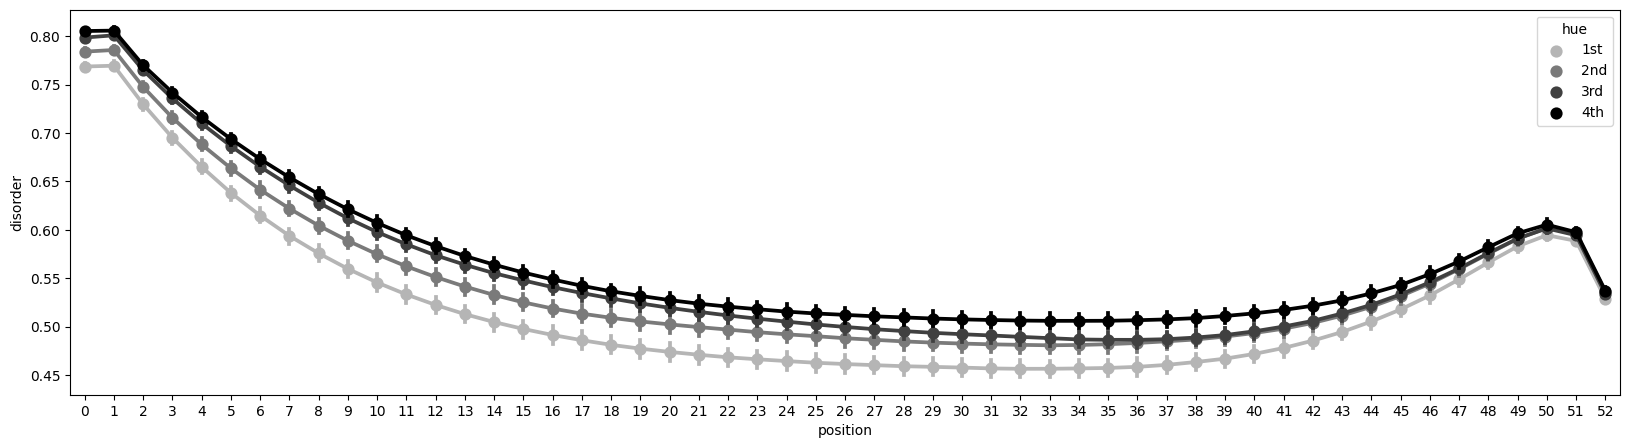

In [19]:
# Supplementary Figure 
plt.figure(figsize=(20,5))
sns.pointplot(data=pd.concat([df1_c,df2_c,df3_c,df4_c]), x="position", y="disorder",hue='hue')
#plt.savefig('Figures/20230408_Confidence_metapredict_all_greys.pdf')

In [51]:
colors=['#B5B5B5','#000000']
sns.set_palette(sns.color_palette(colors))


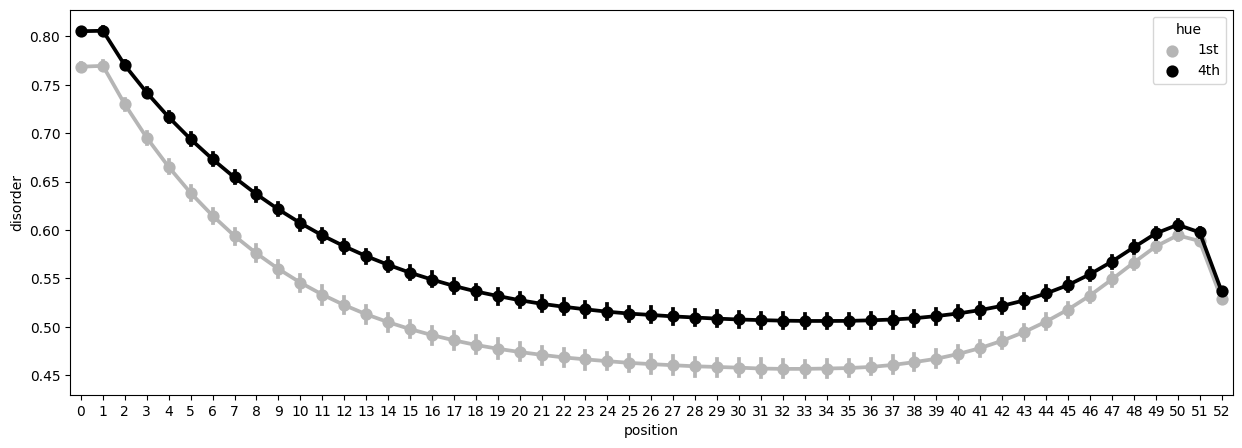

In [53]:
plt.figure(figsize=(15,5))
sns.pointplot(data=pd.concat([df1_c,df4_c]), x="position", y="disorder",hue='hue')
plt.savefig('Figures/20230408_Confidence_metapredict_greys.pdf')

In [75]:
fin.iloc[-1:].metapredict.values

array([array([0.8657, 0.9016, 0.8812, 0.8722, 0.8526, 0.8137, 0.7937, 0.7968,
              0.7971, 0.7762, 0.794 , 0.779 , 0.7755, 0.7826, 0.7902, 0.7985,
              0.8073, 0.8128, 0.8156, 0.823 , 0.8235, 0.8404, 0.8471, 0.8442,
              0.8268, 0.8217, 0.796 , 0.8203, 0.8279, 0.8386, 0.8431, 0.8471,
              0.8407, 0.819 , 0.7978, 0.7589, 0.712 , 0.6512, 0.5998, 0.5269,
              0.4567, 0.3832, 0.3311, 0.3011, 0.3103, 0.3251, 0.3449, 0.3974,
              0.4438, 0.4905, 0.5022, 0.5209, 0.463 ])                       ],
      dtype=object)

<Axes: xlabel='metapredict_ratio', ylabel='Count'>

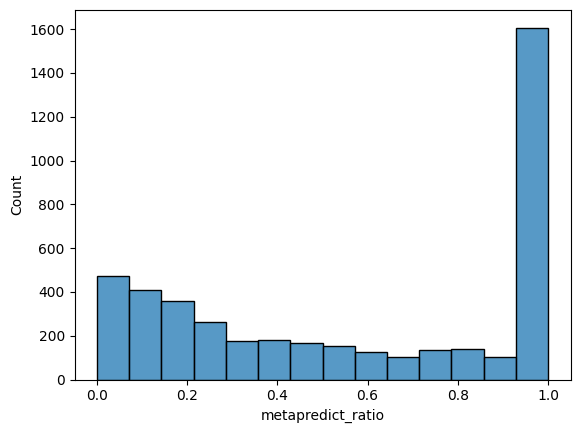

In [77]:
sns.histplot(data=df1,x='metapredict_ratio')

<Axes: xlabel='metapredict_ratio', ylabel='Count'>

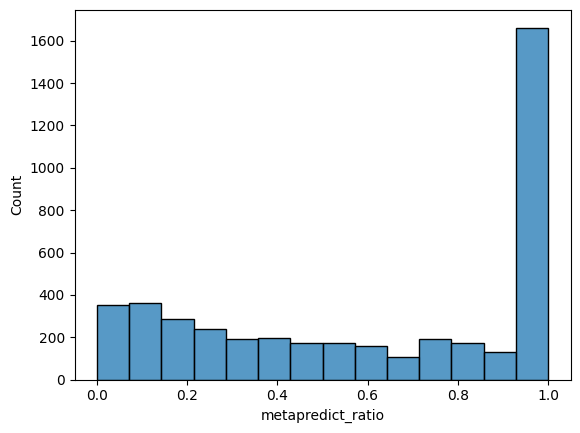

In [79]:
sns.histplot(data=df2,x='metapredict_ratio')

In [93]:
print(out)

[[array([0.5334, 0.5253, 0.5646, 0.5835, 0.5609, 0.5554, 0.5903, 0.5839,
       0.5704, 0.5572, 0.5783, 0.6002, 0.5609, 0.5585, 0.5857, 0.5797,
       0.5613, 0.5525, 0.5496, 0.5708, 0.5574, 0.544 , 0.5576, 0.5516,
       0.5698, 0.5684, 0.5819, 0.5982, 0.5569, 0.5345, 0.538 , 0.5283,
       0.5466, 0.5405, 0.5301, 0.5711, 0.5611, 0.5449, 0.601 , 0.5984,
       0.585 , 0.5712, 0.5997, 0.6277, 0.5988, 0.5751, 0.6036, 0.5884,
       0.5492, 0.5257, 0.5359, 0.546 ]), Series([], Name: seq, dtype: object)]]


In [90]:
df_meta.head()

,Locus,seq,metapredict_disorder,metapredict_domainbound
0,AT1G55325.2,MWTNVFRIGGLHNVSWFQFLPSETELNPGFDRSSRAEQNEVATYLV...,"[0.8474, 0.7903, 0.7401, 0.6456, 0.5836, 0.540...","[[0, 37], [193, 888], [930, 950], [985, 1048],..."
1,AT1G25211.1,MRRRRCDLQPKRTRMCDLQPKRTSMCDLPPKLVGEKILTRIPITSL...,"[0.9685, 0.9459, 0.9534, 0.9446, 0.9559, 0.933...","[[0, 27], [392, 433]]"
2,AT1G55550.1,MERTRSKPVRNLPETIHSLLGLKSHMTSDWVKSVCNIAKNTSSTSK...,"[0.9624, 0.9486, 0.9502, 0.932, 0.9163, 0.8971...","[[0, 50], [274, 291], [459, 859]]"
3,AT1G54230.1,MDSADANVTFEYTLSLDDMVFEALSTIDDEHDGTGRDVDGIFKFNN...,"[0.8735, 0.9014, 0.8796, 0.8377, 0.7821, 0.728...","[[84, 100]]"
4,AT1G25422.1,MKKERKRQVQEEEEEKEVEVVVVDALTAAATVAAAAAMEEEEQLWG...,"[0.7794, 0.8296, 0.8093, 0.77, 0.7497, 0.7321,...",[]


In [149]:
info_sub = info[['Locus','protein','metapredict','metapredict_ratio_disorder']]

In [171]:
data = pd.read_csv('Tables/Double_check/20230308 Final_data_curated.csv')

In [173]:
data['disorder_ADonly'] = data.protein.apply(lambda x : meta.predict_disorder(x))

In [187]:
out = []
out_ratio =[]
for y in data.iterrows():
    #disorder = np.fromstring(df_meta[df_meta.Locus==y[1][0]].metapredict_disorder.values[0], dtype=float)
    frequency = calculate_frequency_above_threshold(np.array(ast.literal_eval(str(y[1][-1]))), 0.5)
    #out.append(disorder[y[1][3]-1:y[1][3]+52])
    out_ratio.append(frequency)
    

In [188]:
data['disorder_ratio_ADonly'] = out_ratio

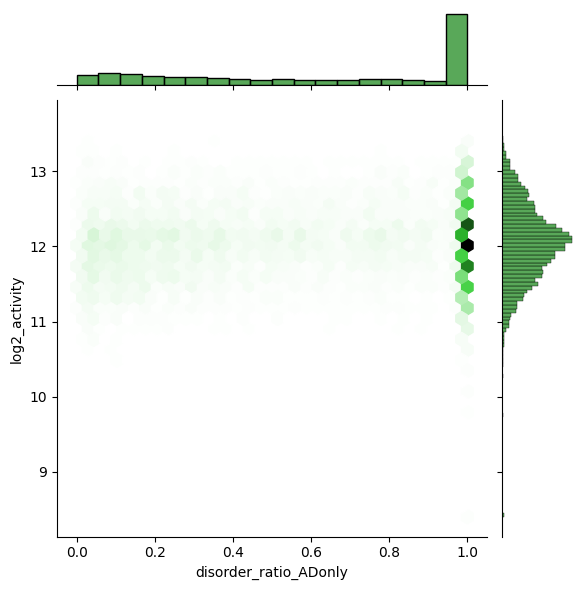

In [195]:
sns.jointplot(data,y='log2_activity',x='disorder_ratio_ADonly',kind="hex", color="forestgreen")
plt.savefig('Figures/20230408 Metapredict vs activity ADonly.pdf')

In [164]:
data_extend = pd.merge(data,info_sub,on='protein',how='left')

In [166]:
data_extend['disorder_ADonly'] = data.protein.apply(lambda x : meta.predict_disorder(x))

In [168]:
data_extend = data_extend.dropna(subset='disorder_ADonly')

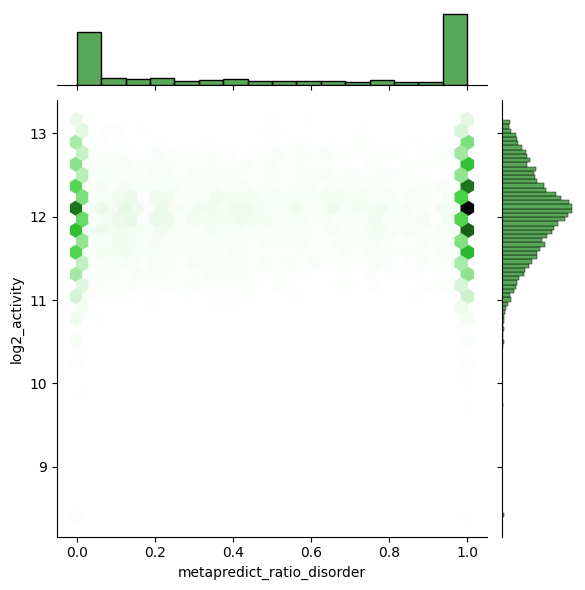

In [194]:
sns.jointplot(data_extend,y='log2_activity',x='metapredict_ratio_disorder',kind="hex", color="forestgreen")
plt.savefig('Figures/20230408 Metapredict vs activity FL protein.pdf')

# Figure 2C, Supplementary Figure 8A

In [21]:
data = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [22]:
# Protein sequence of synthetic TF, mcherry+ZifDBD+EBD
syntheticTF = 'MGTVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGWEASSERMYPEDGALKGEIKQRLKLKDGGHYDAEVKTTYKAKKPVQLPGAYNVNIKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKGTRPYACPVESCDRRFSRSDELTRHIRIHTGQKPFQCRICMRNFSRSDHLTTHIRTHTGEKPFACDICGRKFARSDERKRHTKIHTGPAAASTLEDPSAGDMRAANLWPSPLMIKRSKKNSLALSLTADQMVSALLDAEPPILYSEYDPTRPFSEASMMGLLTNLADRELVHMINWAKRVPGFVDLTLHDQVHLLECAWLEILMIGLVWRSMEHPVKLLFAPNLLLDRNQGKCVEGMVEIFDMLLATSSRFRMMNLQGEEFVCLKSIILLNSGVYTFLSSTLKSLEEKDHIHRVLDKITDTLIHLMAKAGLTLQQQHQRLAQLLLILSHIRHMSNKGMEHLYSMKCKNVVPLYDLLLEMLDAHRLHAPTSRGGASVEETDQSHLATAGSTSSASG'

In [23]:
#Generate complete synthetic TF for each tile
data['synthetic_TF'] = data.protein.apply(lambda x: syntheticTF + x)

In [24]:
#Predict disorder for all synthetic TFs using metapredict (takes a bit to run)
data['metapredict_synTF'] = data.synthetic_TF.apply(lambda x : meta.predict_disorder_domains(x).disorder)

In [25]:
#Extract metapredict prediction for tile sequence only
data['metapredict_synTF_tile'] = data.metapredict_synTF.apply(lambda x : np.fromstring(x,dtype=float)[-53:])

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1206385789.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data['metapredict_synTF_tile'] = data.metapredict_synTF.apply(lambda x : np.fromstring(x,dtype=float)[-53:])


In [26]:
# Build position centric sub dataframes of all predictions
def convert_position_df(df_in):

    dfs = []
    for x in df_in.iterrows():
        predictions = np.frombuffer(x[1][-2])
        output = []
        count=0
        for y in predictions:
            output.append([count,y,x[1][-1]])
            count+=1
        dfs.append(pd.DataFrame(output,columns=['position','disorder','hue']))
        del predictions
    df_out = pd.concat(dfs)
    
    return(df_out)

In [27]:
df1 = data[:4388]
df2 =data[4388:2*4388]
df3 =data[2*4388:3*4388]
df4 =data[3*4388:]
df5 =data[2*4388:]

In [28]:
df1['Hue'] = '1st'
df2['Hue'] ='2nd'
df3['Hue'] ='3rd'
df4['Hue'] ='4th'
#df5['Hue'] = '4th_q_activity'

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/3640458704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hue'] = '1st'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/3640458704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hue'] ='2nd'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/3640458704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [29]:
df1_c = convert_position_df(df1)
df2_c = convert_position_df(df2)
df3_c = convert_position_df(df3)
df4_c = convert_position_df(df4)

In [30]:
# For first and last quartile
colors=['#B5B5B5','#000000']
sns.set_palette(sns.color_palette(colors))

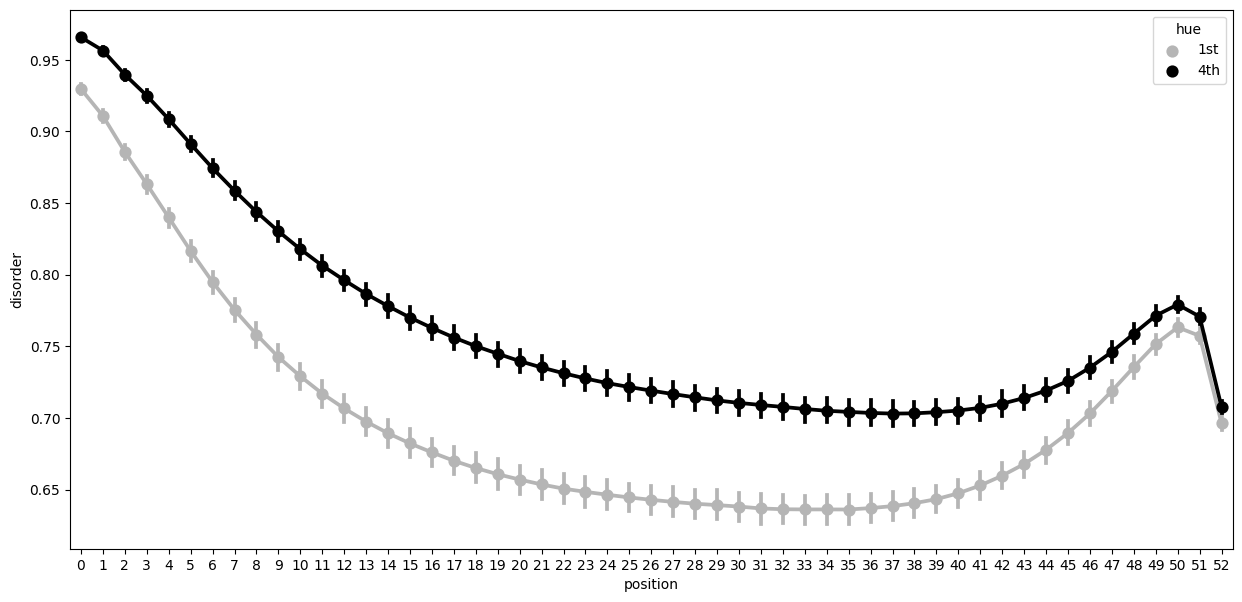

In [31]:
# Figure 2C
plt.figure(figsize=(15,7))
sns.pointplot(data=pd.concat([df1_c,df4_c]), x="position", y="disorder",hue='hue')
ax = plt.gca()

# Set the marker size for the points
marker_size = 0.5
for line in ax.lines:
    line.set_markersize(marker_size)

#plt.savefig('Figures/20230408_Confidence_metapredict_synTF_tiles_greys.pdf')

In [34]:
# For all quartiles
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


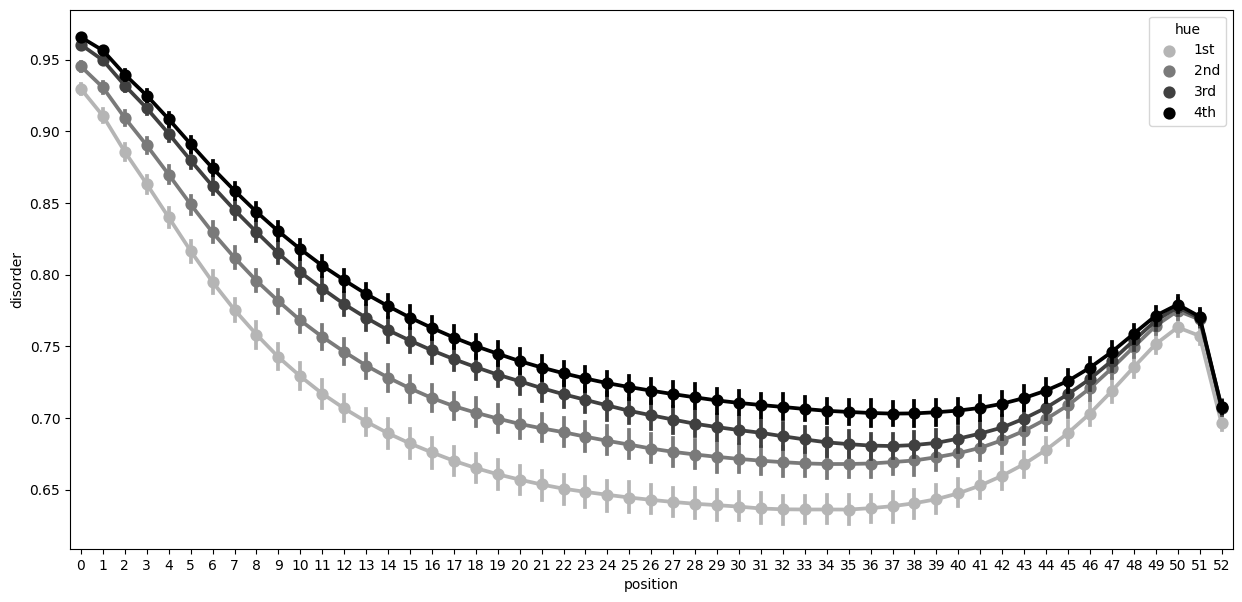

In [33]:
# Supplementary Figure 8A
plt.figure(figsize=(15,7))
sns.pointplot(data=pd.concat([df1_c,df2_c,df3_c,df4_c]), x="position", y="disorder",hue='hue')
ax = plt.gca()

# Set the marker size for the points
marker_size = 0.5
for line in ax.lines:
    line.set_markersize(marker_size)

#plt.savefig('Figures/20230408_Confidence_metapredict_synTF_tiles_all_greys.pdf')

# Supplementary Figure 8B

In [36]:
data = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [37]:
AT = pd.read_csv('Tables/s4pred_AT_exons_df.csv')
SC = pd.read_csv('Tables/S288C_proteome.csv')

In [38]:
SC_sub = SC[SC.ID.isin(list(dict.fromkeys(data.Locus.to_list())))]
AT_sub = AT[AT.exon.isin(list(dict.fromkeys(data.Locus.to_list())))]

In [41]:
#Predict disorder for all endogenous parent genes using metapredict (takes a bit to run)
SC_sub['fullength_metapredict'] = SC_sub.Sequence.apply(lambda x: meta.predict_disorder_domains(x).disorder) 
AT_sub['fullength_metapredict'] = AT_sub.seq.apply(lambda x: meta.predict_disorder_domains(x).disorder)

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/614279687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SC_sub['fullength_metapredict'] = SC_sub.Sequence.apply(lambda x: meta.predict_disorder_domains(x).disorder)
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/614279687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AT_sub['fullength_metapredict'] = AT_sub.seq.apply(lambda x: meta.predict_disorder_domains(x).disorder)


In [44]:
data

,Unique_tile_ID,Locus,Tile_position_in_parent_protein,DNA,protein,Predicted_activation_PADDLE,Z-score_PADDLE,Activity_1mil_GFP_sort,reads_1mil_GFP_sort,Activity_500k_GFP_sort,reads_500k_GFP_sort,log2_activity,log2_predicted_activity
0,YGL245W_3014,YGL245W,612,TTAGCTGATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCG...,LADTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIA...,24.242592,7.822235,338.00000,22,NaN,NaN,8.400879,4.599472
1,AT5G18230.4_2190,AT5G18230.4,195,GATGAATTAAGTCCAGAACAAGTAAATGACGTCAAAGATTTTCTGG...,DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...,46.395610,9.414828,338.00000,23,338.00000,19.0,8.400879,5.535916
2,AT3G16570.1_4102,AT3G16570.1,32,CAATCCACCGAATTCGCCGGAGATTTCCCTCCATTCGAAACAGAGT...,QSTEFAGDFPPFETECRGTIAECSVSAALGDGGDLFYGGGEMGEEF...,36.852043,8.849788,338.00000,36,NaN,NaN,8.400879,5.203673
3,YGL245W_3077,YGL245W,614,GATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCGACCATT...,DTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIADL...,24.079853,7.805709,338.00000,13,NaN,NaN,8.400879,4.589755
4,AT5G37340.2_2379,AT5G37340.2,429,AGCTTAGAACAGGAATGGACATTGATTCTTGATGACGAATTAGCGA...,SLEQEWTLILDDELANSFISPVTDDIKDDHQLTFEEYERSWEQNEE...,45.142406,9.347643,338.00000,19,NaN,NaN,8.400879,5.496411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,AT3G12320.1_11883,AT3G12320.1,128,AGGGAAGTCCCTATGTTCCATTGTCATGACATGTCTTTCAAGGAGG...,REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...,19.945688,7.343549,12773.62002,40,1458.00000,39.0,13.640880,4.318005
17549,YEL040W_1484,YEL040W,167,CTTGATTACGAATTCGTCGGTGCTGATCTAGAAACTGCTCAAACCA...,LDYEFVGADLETAQTNFYWESVLNYTNSANISTTDTFENYHTYELD...,31.481344,8.463312,12830.49091,16,NaN,NaN,13.647289,4.976425
17550,AT5G64910.2_188,AT5G64910.2,168,AAAACGACCAAGGCGCAAGCATCTGAGCCTGAGTACTTCGAAGAGA...,KTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALNEFNWDF...,87.474810,10.970746,12969.29369,348,NaN,NaN,13.662812,6.450796
17551,AT2G40120.1_4890,AT2G40120.1,116,TATCCAGAGTGGAGCGAGTTTTACTTGCACAATGAGACTGAAGATG...,YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...,34.360504,8.678030,12972.91370,20,435.44413,38.0,13.663215,5.102679


In [47]:
# Extract predictions for the respective position in the endogenous protein
output = []
count = 0
for x in data.iterrows():
    if x[1].Locus[0]=='A':
        sub = AT_sub[AT_sub.exon == x[1].Locus]
        prediction = sub.fullength_metapredict.values[0]
        output.append(prediction[x[1].Tile_position_in_parent_protein-1:x[1].Tile_position_in_parent_protein+52])
        count +=1
    else:
        sub = SC_sub[SC_sub.ID == x[1].Locus]
        prediction = sub.fullength_metapredict.values[0]
        output.append(prediction[x[1].Tile_position_in_parent_protein-1:x[1].Tile_position_in_parent_protein+52])



In [49]:
data ['metapredict'] = output

In [50]:
df1 = data[:4388]
df2 =data[4388:2*4388]
df3 =data[2*4388:3*4388]
df4 =data[3*4388:]

In [51]:
df1['Hue'] = '1st'
df2['Hue'] ='2nd'
df3['Hue'] ='3rd'
df4['Hue'] ='4th'

/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hue'] = '1st'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hue'] ='2nd'
/var/folders/xb/cc3hd4q54k900w4vqym76dq00000gp/T/ipykernel_63815/1842560270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [52]:
df1_c = convert_position_df(df1)
df2_c = convert_position_df(df2)
df3_c = convert_position_df(df3)
df4_c = convert_position_df(df4)

In [53]:
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


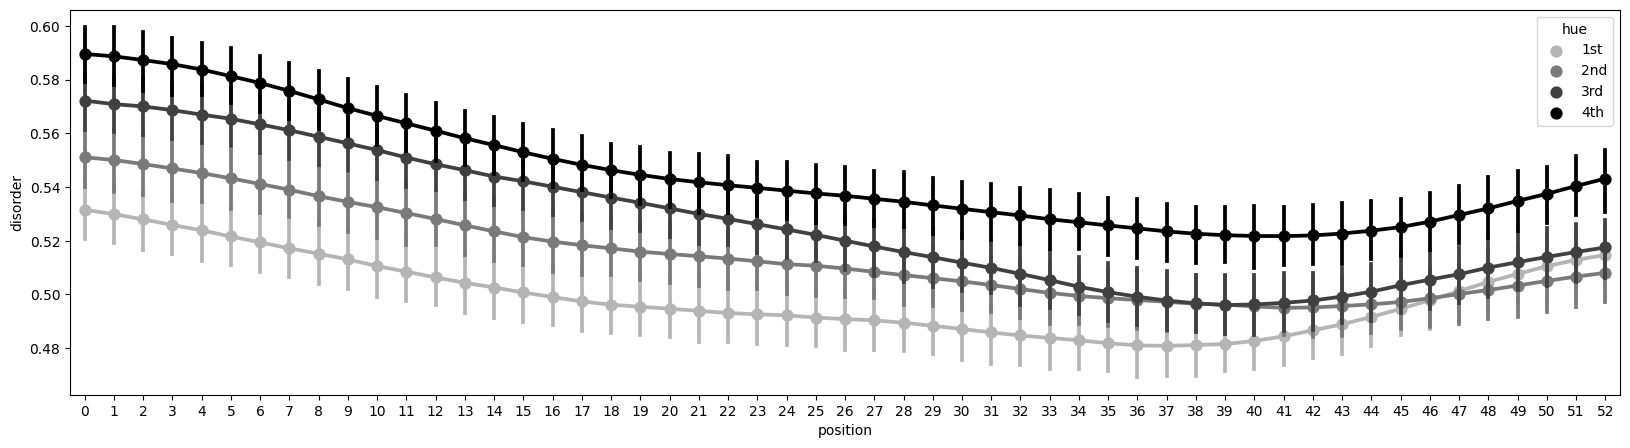

In [54]:
# Supplementary Figure 8B
plt.figure(figsize=(20,5))
sns.pointplot(data=pd.concat([df1_c,df2_c,df3_c,df4_c]), x="position", y="disorder",hue='hue')
ax = plt.gca()

# Set the marker size for the points
marker_size = 0.5
for line in ax.lines:
    line.set_markersize(marker_size)

#plt.savefig('Figures/20230408_Confidence_metapredict_endogenous_tiles_all_greys.pdf')